Consider the Credit Card Fraud Detection data set. You goal is to build a neural network
to predict if a given transaction is fraudulent or not.
Guidelines
1. You are free to use ideas from Kaggle kernels, or any other online resource you may
find. You are not allowed, however, to copy and paste from any source.
2. You are not supposed to exchange information with other groups.


https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
#### Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv1D, MaxPooling1D, BatchNormalization , MaxPool1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D
from keras.layers import MaxPooling1D, MaxPooling2D
from keras.layers import Flatten
from keras import optimizers
from keras.utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import precision_score , accuracy_score , f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale

Using TensorFlow backend.


In [4]:
### Load the data from local drive
path_data="C:\\Users\\fbaharkoush\\IE 598 Machine Learning\\Neural Network Proejcts\\Credit Card Fruad Detection\\Data\\"
df_data=pd.read_csv(path_data+"creditcard.csv")
df_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
if df_data.isnull().sum().sum()==0:
    print("No missing value in the dataset")

No missing value in the dataset


In [6]:
### Get a summary of number of Fruad (1) and Number of Regular (0) transaction
pd.options.display.float_format = '{:,.2f}'.format
pd.merge(df_data.groupby("Class")["Amount"].describe().reset_index(),
         df_data.groupby("Class")["Amount"].sum().reset_index(name="Amount"))

,Class,count,mean,std,min,25%,50%,75%,max,Amount
0,0,"284,315.00",88.29,250.11,0.00,5.65,22.00,77.05,"25,691.16","25,102,462.04"
1,1,492.00,122.21,256.68,0.00,1.00,9.25,105.89,"2,125.87","60,127.97"


This Dataset is imbalanced so random sampling would not enter 80% of fruad transactions into the Traning set. Therefore, we we will use SMOTE package to generate sample from minority class (in this case fruad (y=1))

In [8]:
### Data Preprations
df_data["Time"]=scale(df_data["Time"])
df_data["Amount"]=scale(df_data["Amount"])
X_features=df_data.drop("Class",axis=1).columns
### n_cols is the number of features
n_cols=X_features.shape[0]

### X (independent and y targte varibale)
X=df_data[X_features].values
y=df_data["Class"].values

### SMOTE

In [9]:
### Split the dataset into train and tets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, stratify=y,test_size=.25)

In [10]:
print("Shape of X_train Before SMOTE", (X_train.shape))

Shape of X_train Before SMOTE (213605, 30)


In [11]:
### SMOTE the Train Portion
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
print("Shape of X_train After SMOTE", (X_train.shape))

Shape of X_train After SMOTE (426472, 30)


### Custome Recall, Precision, and F1-score to keep track of these metrics while fitting the model 

In [12]:
# Recall function
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [13]:
# Precision function
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [14]:
# F1-measure function
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

### Fit Logistic Regression
Just to compare it's performance against Convoluted Neural Network Model

In [15]:
# ## Fit the Model
# logReg_model=LogisticRegression(solver='lbfgs')
# logReg_model.fit(X_train,y_train)
# ### Predict
# y_pred_train=logReg_model.predict(X_train)
# y_pred_test=logReg_model.predict(X_test)

# print("Accuracy Score of Logistic Regression Model on Train Set",logReg_model.score(X_train,y_train))
# print("Accuracy Score of Logistic Regression Model on Test Set",logReg_model.score(X_test,y_test))
# print("ROC_AUC of Logistic Regression Model on Train Set",roc_auc_score(y_train,y_pred_train))
# print("ROC_AUC  of Logistic Regression Model on Test Set",roc_auc_score(y_test,y_pred_test))

In [16]:
# print(classification_report(y_test,logReg_model.predict(X_test)))

In [17]:
# confusion_matrix(y_test,y_pred_test)

### Tow layers of 1D Convolutional Neural Network

In [19]:
X_train.shape,X_test.shape

((426472, 30), (71202, 30))

In [20]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 
numer_of_unique_values_of_target_varibale=len(np.unique(y_train))

In [21]:
X_train.shape,X_test.shape

((426472, 30, 1), (71202, 30, 1))

In [22]:
numer_of_unique_values_of_target_varibale

2

In [38]:
### Initiate the model and form the model. It's convoluted network. 
### First layer is a convoluted layer with 40 output space and length of 10 in 1D convolution window
### then 10% of the info is forgotten and passed to the 2nd Layer with 35 nodes
### then 10% of the info is forgotten and passed to the 3rd Layer with 40 output space and length of 10 in 1D convolution window
### the 10% of the info is forgotten and passed to MaxPoolin to reduce dimentionality
### flatten will unstack all the tensor values into a 1-D tensor and teh passed 
### to a dense network having 2 outputs (Fruad or regular Transaction)

num_filters = 40
filter_size = 10
pool_size = 2

conv_1D_model = Sequential([
  Conv1D(num_filters, filter_size, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.1),
    Dense(35, activation='relu'),
    Conv1D(num_filters, filter_size, activation='relu'),
    Dropout(0.1),
  MaxPooling1D(pool_size=pool_size),
    Dropout(0.1),
  Flatten(),
    ### For the last layer the number of nodes has to be equal to the distinct number of target varibale  
  Dense(numer_of_unique_values_of_target_varibale, activation='sigmoid'),
])

### Compile the model
conv_1D_model.compile(optimizer='adam',
  loss='binary_crossentropy',
  metrics=['acc',f1_m, precision_m, recall_m])

In [39]:
"""Keras has a utility method that fixes the input issue by a fucntion called to_categorical. It turns our array of class 
integers into an array of one-hot vectors instead. For example, 2 (from 0 to 9) would become [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
(it’s zero-indexed)."""
### Fit the model
conv_1D_model_history=conv_1D_model.fit(
  X_train,
  to_categorical(y_train),
  epochs=15,
  validation_data=(X_test,
                   to_categorical(y_test)))

Train on 426472 samples, validate on 71202 samples
Epoch 1/15
426472/426472 [==============================] - 62s 145us/step - loss: 0.0318 - acc: 0.9896 - f1_m: 0.9896 - precision_m: 0.9897 - recall_m: 0.9897 - val_loss: 0.0169 - val_acc: 0.9972 - val_f1_m: 0.9972 - val_precision_m: 0.9972 - val_recall_m: 0.9972
Epoch 2/15
426472/426472 [==============================] - 61s 143us/step - loss: 0.0118 - acc: 0.9970 - f1_m: 0.9970 - precision_m: 0.9970 - recall_m: 0.9970 - val_loss: 0.0142 - val_acc: 0.9969 - val_f1_m: 0.9969 - val_precision_m: 0.9969 - val_recall_m: 0.9969
Epoch 3/15
426472/426472 [==============================] - 64s 150us/step - loss: 0.0088 - acc: 0.9978 - f1_m: 0.9978 - precision_m: 0.9978 - recall_m: 0.9978 - val_loss: 0.0158 - val_acc: 0.9975 - val_f1_m: 0.9975 - val_precision_m: 0.9975 - val_recall_m: 0.9975
Epoch 4/15
426472/426472 [==============================] - 64s 150us/step - loss: 0.0082 - acc: 0.9981 - f1_m: 0.9981 - precision_m: 0.9981 - recall_m: 0

### Model Evaluation

In [44]:
print(confusion_matrix(y_test,conv_1D_model.predict_classes(X_test)))

[[70999    80]
 [   21   102]]


In [45]:
print(classification_report(y_test,conv_1D_model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.56      0.83      0.67       123

    accuracy                           1.00     71202
   macro avg       0.78      0.91      0.83     71202
weighted avg       1.00      1.00      1.00     71202



In [46]:
conv_1D_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 21, 40)            440       
_________________________________________________________________
dropout_10 (Dropout)         (None, 21, 40)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 21, 35)            1435      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 40)            14040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 40)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 40)             0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 6, 40)            

### Visualization

In [49]:
# Visualizing loss and accuracy for Training set and validatio
training_loss = conv_1D_model_history.history['loss']
validation_loss = conv_1D_model_history.history['val_loss']
training_Acc = conv_1D_model_history.history['acc']
validation_Acc = conv_1D_model_history.history['val_acc']

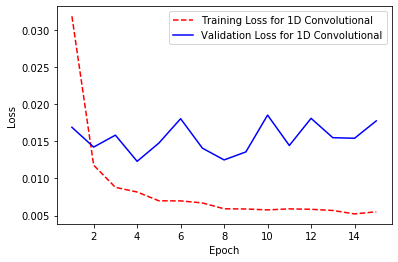

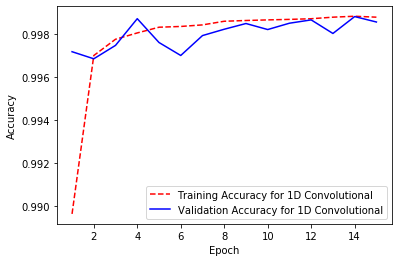

In [50]:
# number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history for conv_1D_model
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss for 1D Convolutional', 'Validation Loss for 1D Convolutional'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# Visualize accuracy history for conv_1D_model
plt.plot(epoch_count, training_Acc, 'r--')
plt.plot(epoch_count, validation_Acc, 'b-')
plt.legend(['Training Accuracy for 1D Convolutional', 'Validation Accuracy for 1D Convolutional'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [51]:
# Evaluating the model (1D Convolutional)
loss, accuracy, f1_score, precision, recall = conv_1D_model.evaluate(X_test, to_categorical (y_test), verbose=0)
print(" 1D Convolutional Loss on test set:", loss)
print(" 1D Convolutional Accuracy on test set:", accuracy)
print(" 1D Convolutional F1_score on test set:", f1_score)
print(" 1D Convolutional Precision on test set:", precision)
print(" 1D Convolutional Recall on test set:", recall)

 1D Convolutional Loss on test set: 0.017750759569638574
 1D Convolutional Accuracy on test set: 0.9985815286636353
 1D Convolutional F1_score on test set: 0.998582124710083
 1D Convolutional Precision on test set: 0.998582124710083
 1D Convolutional Recall on test set: 0.998582124710083


In [52]:
# Evaluating the model (1D Convolutional)
loss, accuracy, f1_score, precision, recall = conv_1D_model.evaluate(X_train, to_categorical (y_train), verbose=0)
print(" 1D Convolutional Loss on train set:", loss)
print(" 1D Convolutional Accuracy on train set:", accuracy)
print(" 1D Convolutional F1_score on train set:", f1_score)
print(" 1D Convolutional Precision on train set:", precision)
print(" 1D Convolutional Recall on train set:", recall)

 1D Convolutional Loss on train set: 0.0030418375601519864
 1D Convolutional Accuracy on train set: 0.9993739128112793
 1D Convolutional F1_score on train set: 0.9993739724159241
 1D Convolutional Precision on train set: 0.9993739724159241
 1D Convolutional Recall on train set: 0.9993739724159241


### Conclusion

In [64]:
pd.DataFrame(confusion_matrix(y_test,conv_1D_model.predict_classes(X_test)))

,0,1
0,70999,80
1,21,102


Over all the model has done a very decent job. 
Only 21 fruad transactions are missed by the model out of 123 transactions.
Only 80 regular transactions are missclassified by the model as fruad out of 71079 transactions.

In [67]:
print(classification_report(y_test,conv_1D_model.predict_classes(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.56      0.83      0.67       123

    accuracy                           1.00     71202
   macro avg       0.78      0.91      0.83     71202
weighted avg       1.00      1.00      1.00     71202

